In [3]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
import os
cwd = os.getcwd()
print(cwd)

D:\Git\MachineLearning\HandsOnML


In [4]:
# reading the data
df = pd.read_csv("datasets/housing/housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Getting some info about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# checking for nulls
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualizing and checking the data tendency

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002533A4530F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002533A0B9B70>]], dtype=object)

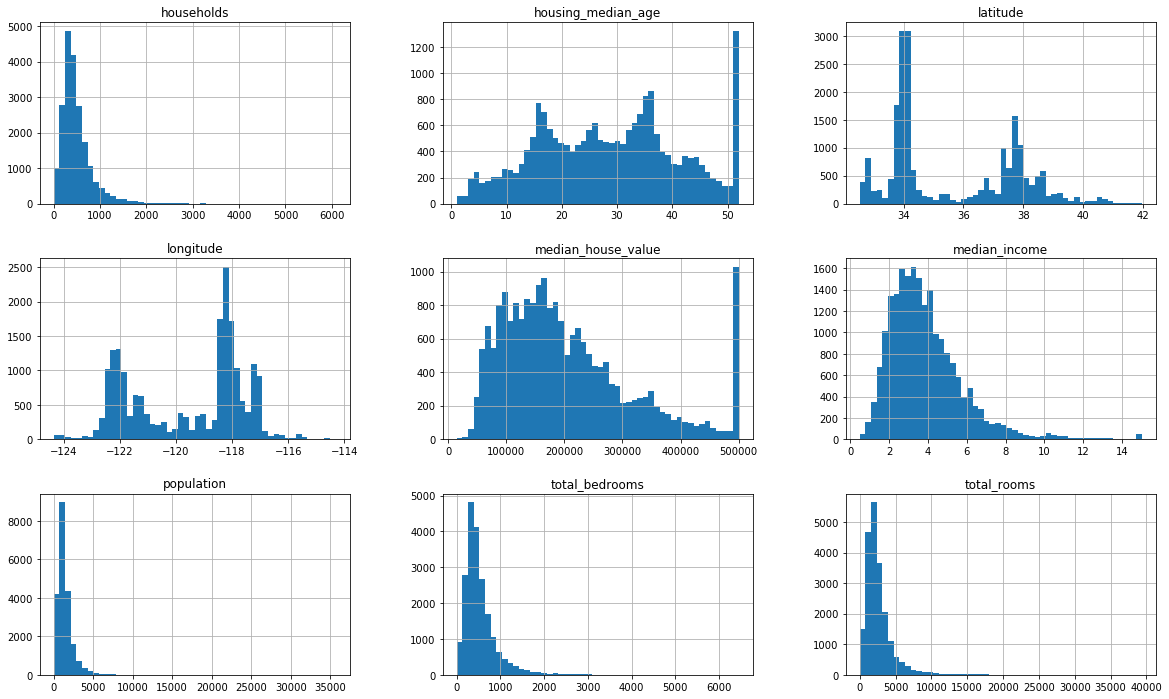

In [10]:
df.hist(bins=50, figsize=(20, 12))

In [20]:
# We can use sklearn preprocessing library for same but this is how we can write the same code in 
# python numpy

def train_test_split(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_indices = int(len(data)*test_ratio)
    train_data = shuffled_indices[test_indices:]
    test_data = shuffled_indices[:test_indices]
    return data.iloc[train_data], data.iloc[test_data]

In [21]:
train_set, test_set = train_test_split(df, 0.2)

In [22]:
print("train_set:"+str(len(train_set))+" test set:"+str(len(test_set)))

train_set:16512 test set:4128


But the problem with this implementation is that it will randomize and see the whole data over few run, we can fix it by initializing the random seed with some value but this will break out when there is a update in data, this will change the data in train and test both

In [27]:
# Using Scikit learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("train_set:"+str(len(train_set))+" test set:"+str(len(test_set)))

train_set:16512 test set:4128


income_cat - Creating a new column which categorize the data such a way that max median income will be 5  
our output variable y is median income

In [29]:
df["income_cat"]=np.ceil(df["median_income"]/1.5)
df["income_cat"].where(df["income_cat"]<5,5.0,inplace=True)

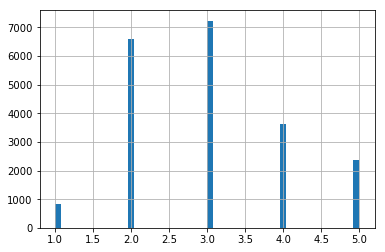

In [35]:
df["income_cat"].hist(bins=50)

As you can see, we have removed the long tail of median income and shrink the data into 1-5 range.  
Now, using sklearn Statified Split to split the data

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

In [37]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(df, df["income_cat"]):    # obj.split(X, y)
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [41]:
# lets check the % data distrinution in income_cat column
df["income_cat"].value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [44]:
# now dropping the df["income_cat"] from the train, test data
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

In [45]:
# keeping the train data copy aside to keep it intact with our explorations steps
housing = strat_train_set.copy()

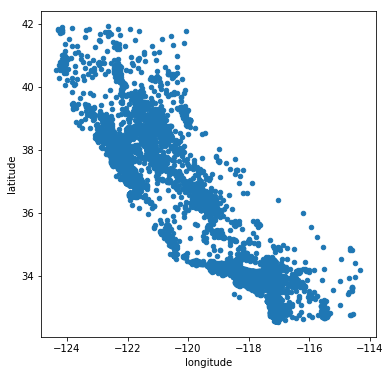

In [57]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(6, 6))

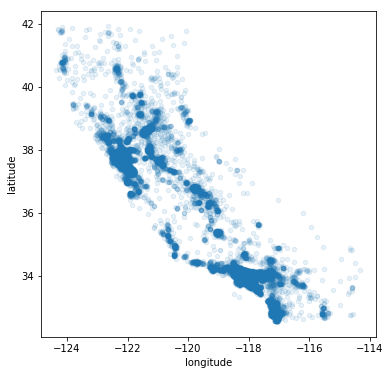

In [58]:
# for density check, add an other option alpha
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(6, 6), alpha=0.1)

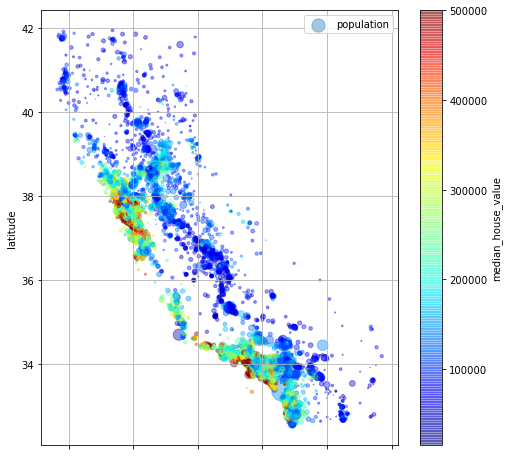

In [77]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(8, 8), alpha=0.4,
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             s=housing["population"]/100, label="population",
             grid=True,  legend=True)


### Looking for corelation if any

In [78]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [79]:
# looking for relation between 
# The correlation coefficient only measures l inear correlations (“if x goes up, then y general ly goes up/down”). 
# It may completely miss out on nonl inear relationships (e.g., “if x is close to zero then y general ly goes up”)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025347502978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025348B75EF0>]], dtype=object)

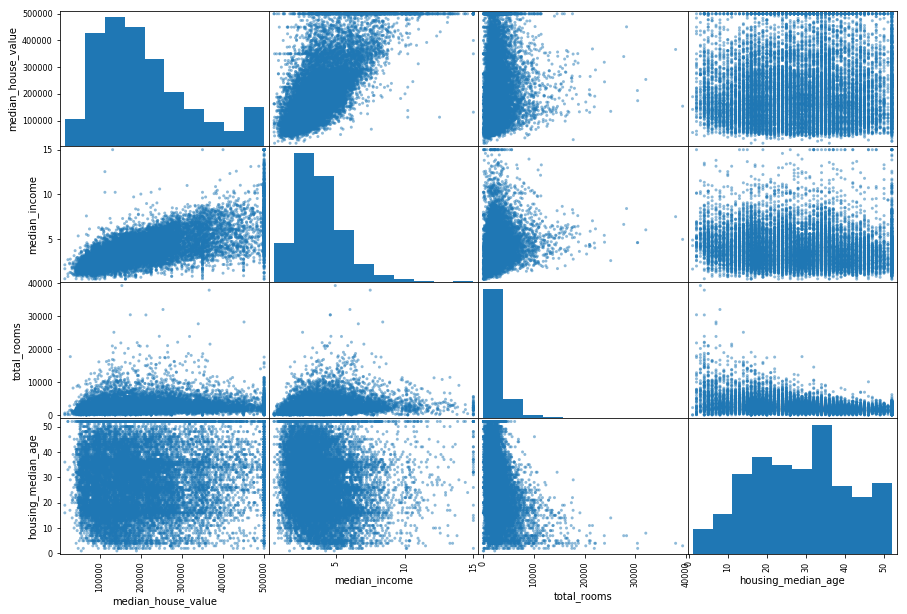

In [85]:
# Using pandas scatter matrix function
attr = ["median_house_value","median_income","total_rooms","housing_median_age"]
pd.plotting.scatter_matrix(housing[attr], figsize=(15, 10))